## Descomposición en Valores Singulares en ${\rm I\!R}^{mxn}$
Sea $A \in {\rm I\!R}^{mxn}$ la descomposición en valores singulares (SVD) es una factorización de la forma

\begin{gather*}
A = \underset{mxm} U \underset{mxn} \sum \underset{nxn} V^{T}
\end{gather*}

donde $U$ y $V$ son ortogonales, es decir

\begin{gather*}
U U^{T} = U^{T} U = I_{m}
\end{gather*}

\begin{gather*}
V V^{T} = V^{T} V = I_{n}
\end{gather*}

$\sum$ es una matriz generalizada
\begin{equation}
\sum = \left[
    \begin{matrix}
        \sigma_{1} & \! & \! & \! & \! & \! \\
        \! & \sigma_{2} & \! & \! & \! & \! \\ 
        \! & \! & \ddots & \! & \! & \! \\
        \! & \! & \! & \sigma_{r} & \! & \! \\
        \! & \! & \! & \! & 0 & \! \\
        \! & \! & \! & \! & \!& \ddots
    \end{matrix}
    \right]
\end{equation}

donde $\sigma_{1} \geq \sigma_{2} \geq \dotsc \geq \sigma_{r} \geq 0$. Los números $\sigma_{1}$, $\sigma_{2}$, $\dotsc$, $\sigma_{r}$ son los valores singulares de A.

In [1]:
% Descomposicion en valores singulares
A = rand(4, 6);
[U, S, V] = svd(A); % Donde A = U * V * S'

Sea $A \in {\rm I\!R}^{mxn}$ y $K \leq min(m, n)$. Una imagen $A$ se puede comprimir con un porcentaje

\begin{gather*}
\dfrac{K}{min(m, n)} \cdot 100
\end{gather*}

utilizando la fórmula $A_{k} = U_{k} \sum_{k} V_{k}^{T}$, donde $A_{k}$ es la imagen comprimida, y $U_{k}$ y $V_{k}$ están formadas con las primeras $K$ columnas de $U$ y $V$, respectivamente, y

\begin{equation}
\sum = \left[
    \begin{matrix}
        \sigma_{1} & \! & \!\\
        \! & \ddots & \! \\
        \! & \! & \sigma_{k}
    \end{matrix}
    \right]_{kxk}
\end{equation}


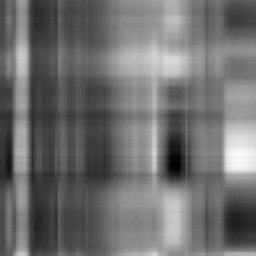

In [2]:
% Comprimir el canal rojo utilizando la SVD
A = imread("media/lena.jpg");
R = A(:, :, 2); % Canal rojo
R = im2double(R);
[U, S, V] = svd(R);
k = 2;
Uk = U(:, 1:k); Sk = S(1:k, 1:k); Vk = V(:, 1:k);
R_k = Uk * Sk * Vk';
imshow(R_k)

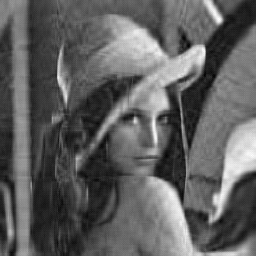

In [3]:
k = 25;
Uk = U(:, 1:k); Sk = S(1:k, 1:k); Vk = V(:, 1:k);
R_k = Uk * Sk * Vk';
imshow(R_k)

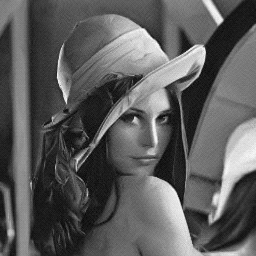

In [4]:
k = 100;
Uk = U(:, 1:k); Sk = S(1:k, 1:k); Vk = V(:, 1:k);
R_k = Uk * Sk * Vk';
imshow(R_k)

La matriz A puede ser aproximada utlizando $K$ valores singulares ($K \leq min(m,n)$), utilizando la fórmula

\begin{gather*}
A = U_{k} \sum\hspace{0cm}_{k} V^{T}_{k}
\end{gather*}

\begin{gather*}
U = [U_{1}, U_{2}, U_{3}, ..., U_{k}]_{m \times k} 
\end{gather*}

\begin{gather*}
V = [V_{1}, V_{2}, V_{3}, ..., V_{k}]_{n \times k} 
\end{gather*}

\begin{equation}
\sum = \left[
    \begin{matrix}
        \sigma_{1} & \! & \!\\
        \! & \ddots & \! \\
        \! & \! & \sigma_{k}
    \end{matrix}
    \right]_{kxk}
\end{equation}


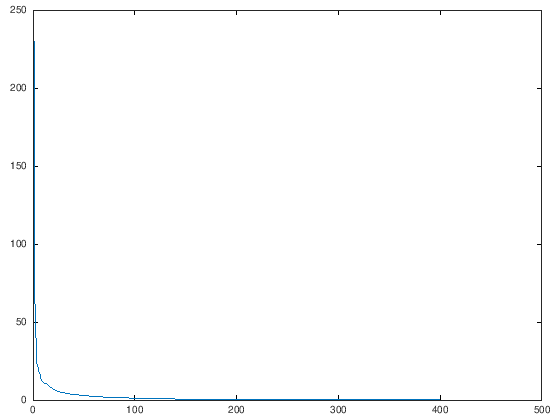

In [5]:
% Se carga la imagen
A = imread('media/cameraman.jpg');

% Cambio de formato a double
A = im2double(A);
[m, n] = size(A);

% Escribe los valores singulares en el vector s
s = svd(A);
r = min([m, n]);

plot(1:r, s)

En esta gráfica se puede observar que a partir de 100 los valores son casi cero, por lo que no es necesario utilizar todos para reconstruir la imagen con una buena calidad.

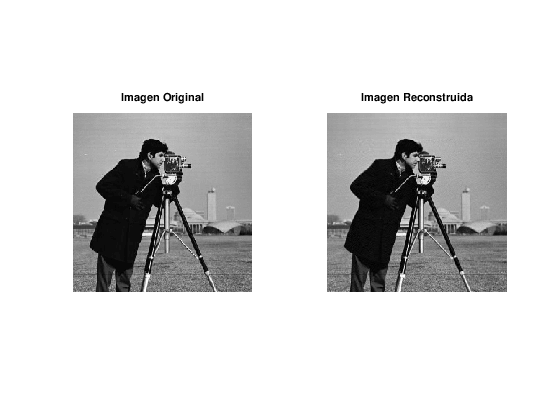

In [6]:
[U, S, V] = svd(A);
k = 100; %Factor de compresión
Uk = U(:, 1:k); Sk = S(1:k, 1:k); Vk = V(:, 1:k);
A_k = Uk * Sk * Vk';
subplot(1, 2, 1); % Se divide la grafica en una fila y en dos columnas
imshow(A);
title('Imagen Original')

subplot(1, 2, 2);
imshow(A_k);
title('Imagen Reconstruida')

¿Cuál es el mejor valor de K, que construye una imagen A?
Respuesta: K = rank(A);

k =  469


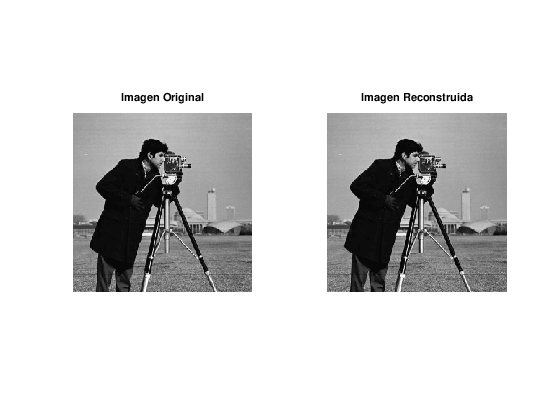

In [7]:
[U, S, V] = svd(A);
k = rank(A) %Factor de compresión
Uk = U(:, 1:k); Sk = S(1:k, 1:k); Vk = V(:, 1:k);
A_k = Uk * Sk * Vk';
subplot(1, 2, 1); % Se divide la grafica en una fila y en dos columnas
imshow(A);
title('Imagen Original')

subplot(1, 2, 2);
imshow(A_k);
title('Imagen Reconstruida')

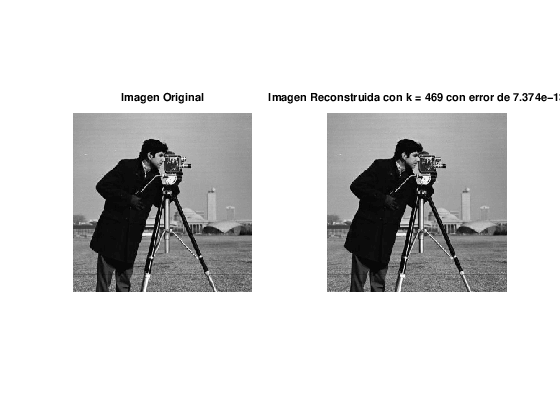

In [8]:
[U, S, V] = svd(A);
dimensiones = [1 20:20:460 r]; % Limite inferior, inicia en 20, salta de 20 en 20,
%hasta 460, limite derecho.

for k = dimensiones
  Uk = U(:, 1:k); Sk = S(1:k, 1:k); Vk = V(:, 1:k);
  A_k = Uk * Sk * Vk';
  error = norm(A - A_k);
  subplot(1, 2, 1); % Se divide la grafica en una fila y en dos columnas
  imshow(A);
  title('Imagen Original')

  subplot(1, 2, 2);
  imshow(A_k);
  title(['Imagen Reconstruida con k = ' num2str(k) ' con error de ' num2str(error)])
  pause(0.5)
end

## Sumar imágenes

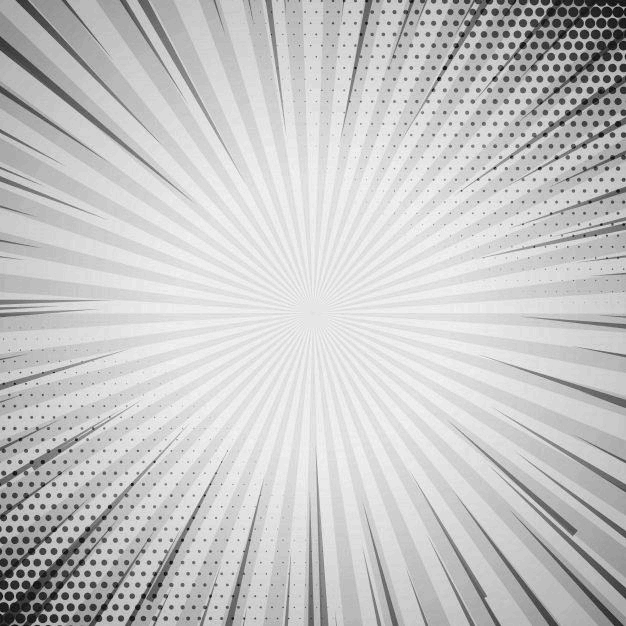

In [9]:
% Trabajar con imagenes .jpg
A = imread('media/cameraman.jpg');
B = imread('media/fondo.jpg');
A = im2double(A);
B = im2double(B);
C = (1/3) * (B(:, :, 1) + B(:, :, 2) + B(:, :, 3));
imshow(C)

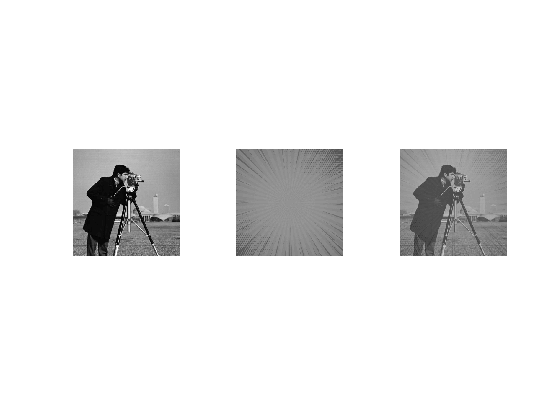

In [10]:
pkg load image

A1 = imresize(A, [256, 256]);
C1 = imresize(C, [256, 256]);
subplot(1, 3, 1);
imshow(A1);
subplot(1, 3, 2);
imshow(C1);
subplot(1, 3, 3);
imshow((1/2) * (A1 + C1)); % Cuando se suman imagenes lo mejor es promediar
% entre la cantidad de imagenes, por eso el (1/2)

## Aclarar y oscurecer una imagen

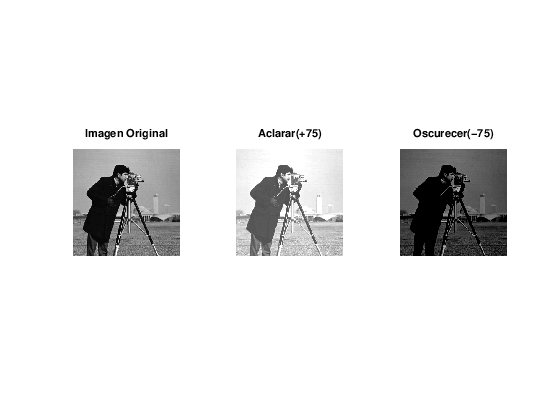

In [11]:
% Aclarar una imagen
A = imread('media/cameraman.jpg');
subplot(1, 3, 1);
imshow(A);
title('Imagen Original');

% para aclarar se debe sumar un numero entre 0 y 275
subplot(1, 3, 2);
imshow(A + 75);
title('Aclarar(+75)');

% para oscurecer se debe restar un numero entre 0 y 275
subplot(1, 3, 3);
imshow(A - 75);
title('Oscurecer(-75)');

## Negativo de una imagen

Sea $A \in {\rm I\!R}^{mxn}$ la representación en formato "double" de una imagen. El negativo de la imagen A es la matriz $B \in {\rm I\!R}^{mxn}$, tal que

\begin{gather*}
B_{i,j} = -A_{i,j} + 1
\end{gather*}

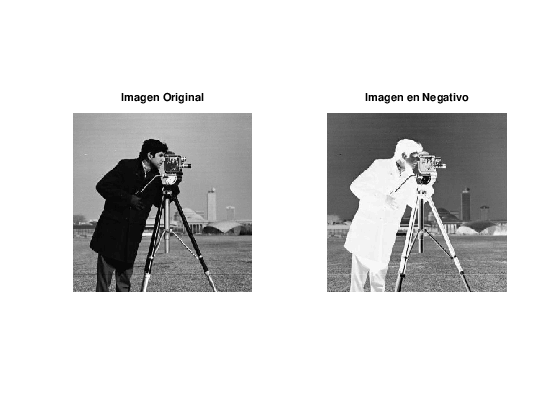

In [12]:
A = imread('media/cameraman.jpg');
subplot(1, 2, 1);
imshow(A);
title('Imagen Original');

% negativo
subplot(1, 2, 2);
A = im2double(A);
imshow(-A + 1);
title('Imagen en Negativo');